menghasilkan data secara acak dengan karakteristik yang dapat disesuaikan

In [2]:
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=1000, n_features=15, n_informative=10, n_redundant=2,n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=42)

Selanjutnya, ubah nilai acak yang yang tersimpan dengan tipe data array menjadi DataFrame agar lebih mudah diolah dan dicerna oleh orang lain.

In [5]:
# Menyusun dataset menjadi DataFrame untuk kemudahan
import numpy as np
import pandas as pd


df = pd.DataFrame(X, columns=[f'Fitur_{i}' for i in range(1, 16)])
df['Target'] = y
 
# Misalkan kita punya beberapa fitur kategorikal (simulasi fitur kategorikal)
df['Fitur_12'] = np.random.choice(['A', 'B', 'C'], size=1000)
df['Fitur_13'] = np.random.choice(['X', 'Y', 'Z'], size=1000)
 
df

,Fitur_1,Fitur_2,Fitur_3,Fitur_4,Fitur_5,Fitur_6,Fitur_7,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_12,Fitur_13,Fitur_14,Fitur_15,Target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,B,Z,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,C,Y,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,C,Y,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,B,X,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,B,Z,0.712335,2.810524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.927482,-0.017325,4.884411,0.542628,3.033376,-1.904407,0.953035,1.278882,-1.293396,1.772169,-1.191263,B,X,-0.387151,-2.629004,0
996,0.347761,-1.690916,5.949207,-2.289729,2.238469,-0.067922,-0.069702,-1.436622,-2.153011,-0.867583,3.962758,A,Z,0.886822,-1.248408,0
997,1.201967,-1.263417,-1.331925,-2.468434,1.777577,2.270456,-0.431749,-1.846263,1.753033,1.858452,4.264568,C,X,0.067260,0.931995,1
998,-2.127846,-0.975838,0.279144,0.151578,-0.443749,0.650616,-1.410265,-1.017319,-0.643070,2.142898,3.399255,A,Y,-0.128774,0.800834,0


Selanjutnya, pisahkan fitur independen dan dependen untuk mempermudah proses feature engineering yang akan dilakukan. 

In [6]:
# Memisahkan fitur dan target
X = df.drop('Target', axis=1)
y = df['Target']

Saat ini, Anda sudah memiliki sebuah dataset yang siap untuk digunakan pada proses feature engineering. Untuk memastikan proporsi data yang ada, silakan cek menggunakan kode berikut.

In [8]:
# Melihat distribusi kelas
from typing import Counter


print("Distribusi kelas sebelum SMOTE:", Counter(y))

Distribusi kelas sebelum SMOTE: Counter({0: 901, 1: 99})


Karena dataset ini memiliki fitur yang cukup banyak, pilihlah fitur (feature selection). Anda dapat menggunakan berbagai macam teknik feature selection yang sebelumnya sudah dipelajari pada materi feature selection. Namun, pada latihan ini mari kita gunakan teknik embedded agar terbiasa dengan teknik yang paling kompleks.

In [11]:
# ------------------- Embedded Methods -------------------
# Menggunakan Random Forest untuk mendapatkan fitur penting
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_integer = X.drop(['Fitur_12', 'Fitur_13'], axis=1)
rf_model.fit(X_integer, y)
 
# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
 
# Menentukan ambang batas untuk fitur penting
threshold = 0.05  # Misalnya, ambang batas 5%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Menampilkan fitur penting beserta nilainya
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    # Jika X asli berbentuk DataFrame, maka kita ambil nama kolom
    print(f"{X.columns[i]}: {importances[i]}")
 
# Mendapatkan nama kolom penting berdasarkan importance
important_features = X_integer.columns[important_features_indices]
 
# Memindahkan fitur penting ke variabel baru
X_important = X_integer[important_features]  # Hanya fitur penting dari data pelatihan
 
# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
Fitur_2: 0.11860019897866206
Fitur_3: 0.06878603593465271
Fitur_5: 0.07731131335837178
Fitur_8: 0.050482655781999855
Fitur_9: 0.2625049418105367
Fitur_10: 0.08958259568334655
Fitur_11: 0.06365230544114515
Fitur_13: 0.12578161860669113

Dimensi data pelatihan dengan fitur penting: (1000, 8)


Setelah proses pemilihan fitur numerik dilakukan, Kita perlu menggabungkan data numerik dan kategorikal seperti semula.

In [12]:
X_Selected = pd.concat([X_important, X['Fitur_12']], axis=1)
X_Selected = pd.concat([X_Selected, X['Fitur_13']], axis=1)
X_Selected

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15,Fitur_12,Fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,B,Z
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,C,Y
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,C,Y
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,B,X
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,B,Z
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,B,X
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,A,Z
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,C,X
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,A,Y


karena masih terdapat data kategorikal pada dataset di atas. Kita harus melakukan encoding terhadap fitur dengan tipe data kategorikal. Pada latihan ini, mari kita gunakan Label Encoding karena berasumsi bahwa kategori yang ada memiliki urutan yang logis (hal ini karena kita menggunakan dummy dataset).

In [13]:
from sklearn.preprocessing import LabelEncoder
 
label_encoder = LabelEncoder()
# Melakukan Encoding untuk fitur 12
X_Selected['Fitur_12'] = label_encoder.fit_transform(X_Selected['Fitur_12'])
# print(label_encoder.inverse_transform(X_Selected[['Fitur_12']]))
# Melakukan Encoding untuk fitur 13
X_Selected['Fitur_13'] = label_encoder.fit_transform(X_Selected['Fitur_13'])
# print(label_encoder.inverse_transform(X_Selected[['Fitur_13']]))
 
print(X_Selected)

      Fitur_2   Fitur_3   Fitur_5   Fitur_8   Fitur_9  Fitur_10  Fitur_11  \
0   -3.472520 -1.314199  0.642138  1.146301 -2.173112  2.765828 -1.821258   
1   -1.770842 -1.578851 -2.025230 -3.958705 -0.598147  1.018789  4.194233   
2   -2.051770  3.631998  1.674093  0.031633 -1.140149  2.069694  1.935251   
3   -1.608657 -0.735184 -1.753532 -2.897416 -0.830328  1.572469  5.334621   
4   -2.362885 -3.909120 -4.029843 -3.435229 -2.142380  2.332385  3.816539   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.017325  4.884411  3.033376  1.278882 -1.293396  1.772169 -1.191263   
996 -1.690916  5.949207  2.238469 -1.436622 -2.153011 -0.867583  3.962758   
997 -1.263417 -1.331925  1.777577 -1.846263  1.753033  1.858452  4.264568   
998 -0.975838  0.279144 -0.443749 -1.017319 -0.643070  2.142898  3.399255   
999  1.387667 -5.554578 -2.834755 -1.932864  2.625895  0.246120  0.786726   

     Fitur_15  Fitur_12  Fitur_13  
0   -0.276558         1         2  
1  

Sampai di sini, semua fitur yang Kita miliki sudah bertipe integer atau numerik. Dengan kondisi seperti ini, dataset yang Kita gunakan sebenarnya sudah siap untuk dilatih. Namun, sebelum melatih dataset tersebut, alangkah baiknya Kita melakukan pengecekan outlier agar model yang dibangun memiliki performa optimal. 

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
# Memilih kolom numerik
numeric_columns = X_Selected.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['Fitur_12', 'Fitur_13'])
 
# Membuat salinan data untuk menjaga data asli tetap utuh
X_cleaned = X_important.copy()

Selanjutnya, mari kita deteksi outlier dengan menggunakan visualisasi data BoxPlot. Dengan menggunakan visualisasi, Anda tidak perlu memberikan effort yang besar kepada otak (beban kognitif) karena pada dasarnya hanya dengan melihat visualisasi Anda sudah dapat mendeteksi outliers.

In [20]:
for col in numeric_columns:
    # Melihat outlier dengan IQR (Interquartile Range)
    Q1 = X_important[col].quantile(0.25)
    Q3 = X_important[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi outlier
    outliers = X_cleaned[(X_cleaned[col] < lower_bound) | (X_cleaned[col] > upper_bound)]
    
    # Menghapus outlier dari DataFrame
    X_cleaned = X_cleaned.drop(outliers.index)

Dengan menghapus nilai outlier, Anda memiliki rentang data yang lebih baik dibandingkan dengan sebelum dihilangkan.

In [21]:
X_cleaned

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834


Jumlah data yang Anda miliki sekarang berjumlah 949 data, jumlah ini mungkin akan berbeda dengan latihan mandiri yang dilakukan karena menggunakan fungsi yang menghasilkan data berbeda. Setidaknya, Anda sudah mengetahui bahwa kode sebelumnya dapat menghilangkan outlier yang ada pada dataset.

Setelah berhasil menghilangkan outlier, mungkin Anda merasa bahwa dataset sudah siap untuk dilatih. Eits, sampai di sini, Anda belum melihat distribusi data. Karena data yang kita gunakan merupakan hasil randomize dari fungsi make_classification(), distribusi data yang dihasilkan belum tentu baik. Selain itu, terdapat permasalahan yang sudah kita tentukan sejak awal pembuatan dataset ini yaitu imbalance dataset. 

Seperti yang sudah Anda ketahui, kita sudah menentukan pembagian dataset pada pada kasus ini dengan proporsi 90-10, 90% untuk kelas pertama dan 10% untuk kelas kedua. Permasalahan ini perlu Anda selesaikan dengan melakukan oversampling atau undersampling sehingga dataset yang digunakan memiliki proporsi yang seimbang. 

Pada kasus ini, kita akan menggunakan teknik SMOTE yang sebelumnya sudah Anda pelajari pada materi Synthetic Minority Oversampling Technique. 

In [27]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Menghapus nilai target yang sesuai dengan outliers
y_cleaned = y.loc[X_cleaned.index]

# 3. Melakukan oversampling pada dataset
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)

# Menampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))

# Mengubah hasil menjadi DataFrame untuk visualisasi atau analisis lebih lanjut
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled, name='Target')

Distribusi kelas setelah SMOTE: Counter({0: 875, 1: 875})


Seperti yang dapat Anda lihat, dataset yang digunakan sudah memiliki proporsi yang seimbang ditandai dengan kedua kelas memiliki jumlah yang sama yaitu 875 data. Selanjutnya, Anda perlu mengecek distribusi data dari kedua kelas tersebut agar dapat mengidentifikasi distribusi data dengan lebih baik. 

Pada latihan kali ini, Anda dapat menggunakan kode berikut untuk membuat visualisasi distribusi data.

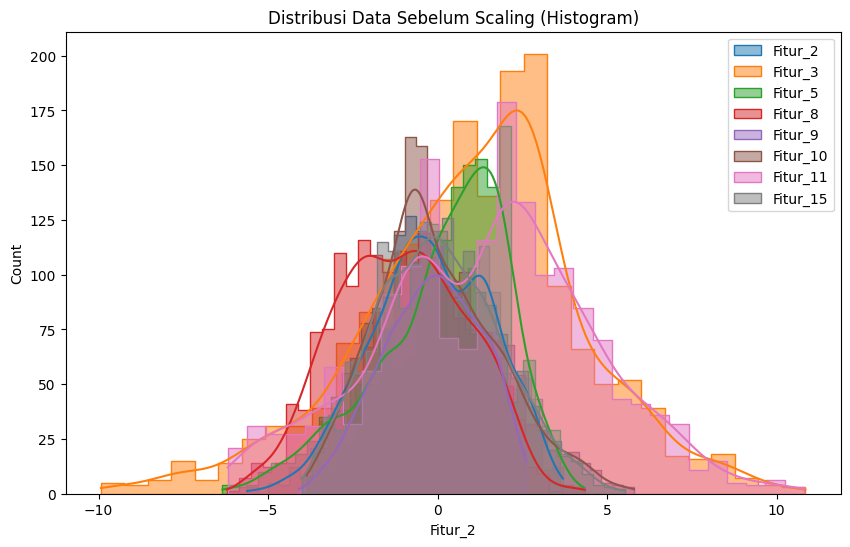

In [28]:
# 1. Visualisasi distribusi data sebelum scaling menggunakan histogram
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Sebelum Scaling (Histogram)')
plt.legend()
plt.show()

Ternyata distribusi data yang dihasilkan memiliki rentang yang berbeda-beda. Hal ini akan menjadi sebuah masalah karena masing-masing fitur memiliki skala yang berbeda juga. Untuk mengatasi permasalahan tersebut, Anda dapat menggunakan scaling fitur seperti normalisasi atau standardisasi agar distribusi data menjadi lebih baik. Pada kesempatan kali ini, kita akan menggunakan standardisasi agar skala data memiliki skala yang sama serta standar deviasi mendekati satu.

In [30]:
# Scaling: Standarisasi fitur numerik menggunakan StandardScaler
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
 
# Melakukan scaling pada fitur penting
X_resampled[important_features] = scaler.fit_transform(X_resampled[important_features])

Setelah Anda melakukan standardisasi seharusnya distribusi data menjadi lebih baik. Untuk melihat perbedaannya, mari kita buat sebuah visualisasi seperti sebelumnya agar dapat melakukan perbandingan.

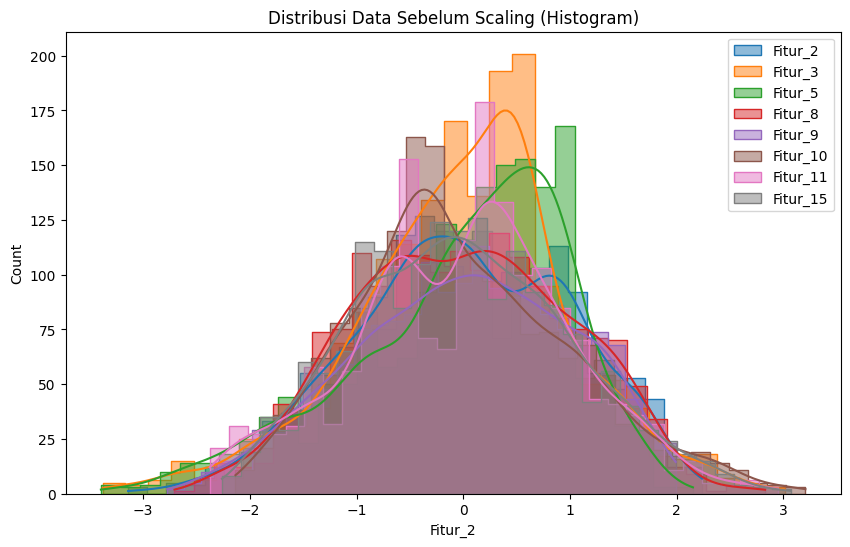

In [31]:
# 1. Visualisasi distribusi data sebelum scaling menggunakan histogram
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Sebelum Scaling (Histogram)')
plt.legend()
plt.show()

Sampai di sini sudah sangat terlihat ‘kan perbedaannya? Untuk memastikan kembali standardisasi dilakukan dengan baik, silakan Anda gunakan kode berikut untuk melihat karakteristik data dengan lebih detail.

In [32]:
X_resampled.describe(include='all')

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15
count,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1750.000000,1.750000e+03,1.750000e+03
mean,3.248195e-17,-2.436147e-17,3.248195e-17,-4.060244e-18,3.248195e-17,0.000000,9.744586e-17,-9.744586e-17
std,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286,1.000286e+00,1.000286e+00
min,-3.140254e+00,-3.378635e+00,-3.395160e+00,-2.705454e+00,-2.773574e+00,-2.133851,-2.375105e+00,-2.260982e+00
25%,-6.753646e-01,-6.026534e-01,-5.875147e-01,-7.350120e-01,-7.296781e-01,-0.686312,-6.562131e-01,-7.685301e-01
50%,7.019504e-03,6.064925e-02,1.916188e-01,4.347537e-03,4.743591e-02,-0.156897,9.778137e-02,-3.796866e-02
75%,7.859312e-01,5.800266e-01,7.374792e-01,7.330751e-01,7.741500e-01,0.660824,6.644054e-01,6.967193e-01
max,2.237440e+00,3.015720e+00,2.152233e+00,2.828207e+00,1.990205e+00,3.206305,2.949236e+00,3.067800e+00


Seluruh fitur yang ada kini sudah memiliki rentang yang serupa dan memiliki standar deviasi mendekati satu. Hal ini berarti proses standardisasi yang Anda lakukan sudah berjalan dengan baik.